In [139]:
# Load libraries
import os
import matplotlib.pyplot as plt
import matplotlib.colors as pc
from netCDF4 import Dataset as NetCDFFile 
import numpy as np
from cartopy import config
import cartopy.crs as ccrs
import xarray as xr
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
#
#Load DATA
# Load NEMO grid
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

#T_NEMO = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jan23/SalishSea_1h_20230101_20230101_grid_T.nc')
T_jan = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01jan23/SalishSea_1h_20230101_20230101_chem_T.nc')#['turbidity']
T_feb = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01feb23/SalishSea_1h_20230201_20230201_chem_T.nc')#['turbidity']
T_mar = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01mar23/SalishSea_1h_20230301_20230301_chem_T.nc')#['turbidity']
T_apr = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1h_20230401_20230401_chem_T.nc')#['turbidity']
T_may = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01may23/SalishSea_1h_20230501_20230501_chem_T.nc')#['turbidity']
T_jun = NetCDFFile ('/results2/SalishSea/nowcast-green.202111/01jun23/SalishSea_1h_20230601_20230601_chem_T.nc')#['turbidity']

# Load Fraser coastline
PNWrivers = loadmat('/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat')


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20230101_20230105
    description: chemistry and light
    title: chemistry and light
    Conventions: CF-1.6
    timeStamp: 2023-Jan-13 00:47:17 GMT
    uuid: 6d0ddae6-9c42-4fad-a954-ce6a8b449c62
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(24)
    variables(dimensions): float32 nav_lat(y, x), float32 nav_lon(y, x), float32 bounds_lon(y, x, nvertex), float32 bounds_lat(y, x, nvertex), float32 area(y, x), float32 deptht(deptht), float32 deptht_bounds(deptht, axis_nbounds), float32 PAR(time_counter, deptht, y, x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter, axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter, axis_nbounds), float32 turbidity(time_counter, deptht, y, x), float32 dissolved_inorganic_carbon(time_counter, deptht, y, x), float32 total_alkalinity(

In [40]:
lat=T_jan.variables['nav_lat'][:]
lon=T_jan.variables['nav_lon'][:]
#turbitity for each month
turb_jan=T_jan.variables['turbidity'][:]
turb_feb=T_feb.variables['turbidity'][:]
turb_mar=T_mar.variables['turbidity'][:]
turb_apr=T_apr.variables['turbidity'][:]
turb_may=T_may.variables['turbidity'][:]
turb_jun=T_jun.variables['turbidity'][:]
#
time=T_jan.variables['time_counter'][:]
depth=T_jan.variables['deptht'][:]
w_map = [-124, -123, 48.5, 49.5]
map = Basemap(projection='merc',llcrnrlon=w_map[0],llcrnrlat=w_map[2],urcrnrlon=w_map[1],urcrnrlat=w_map[3],resolution='h')

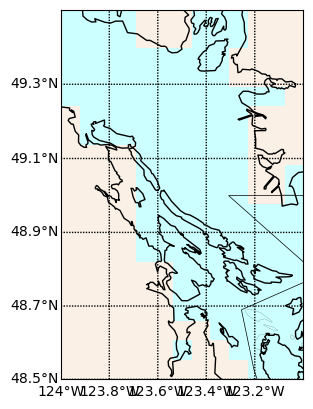

In [136]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')
map.drawcounties()
#
parallels = np.arange(w_map[2],w_map[3],0.2) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(w_map[0],w_map[1],0.2) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
#
bounds = [[0, 26000], [61500, 77000], [107500, 114000], [200000, 203000], [326000, 327000]]
for bound in bounds:
    i_old = 0
    for i in np.argwhere(np.isnan(PNWrivers['ncst'][bound[0]:bound[1], 1]))[:, 0]:
        x, y = map(PNWrivers['ncst'][bound[0]:bound[1], 0][i_old:i],
                 PNWrivers['ncst'][bound[0]:bound[1], 1][i_old:i])
        map.plot(x, y, 'k-')
        i_old = i + 1
x, y = map(grid['nav_lon'].values, grid['nav_lat'].values)

NameError: name 'turb_feb' is not defined

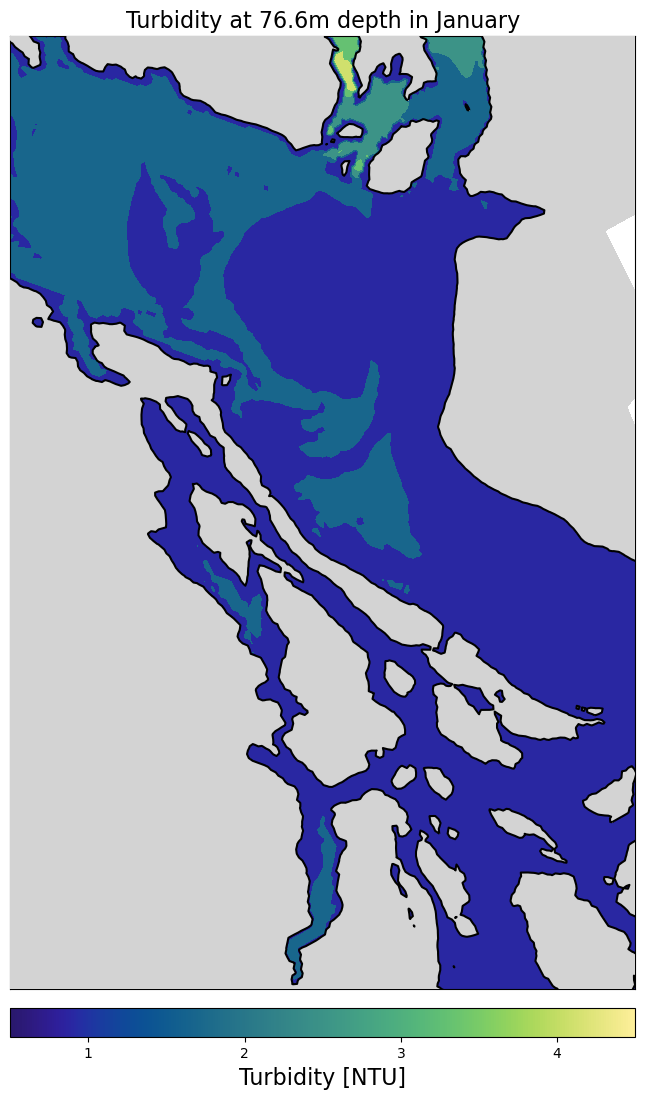

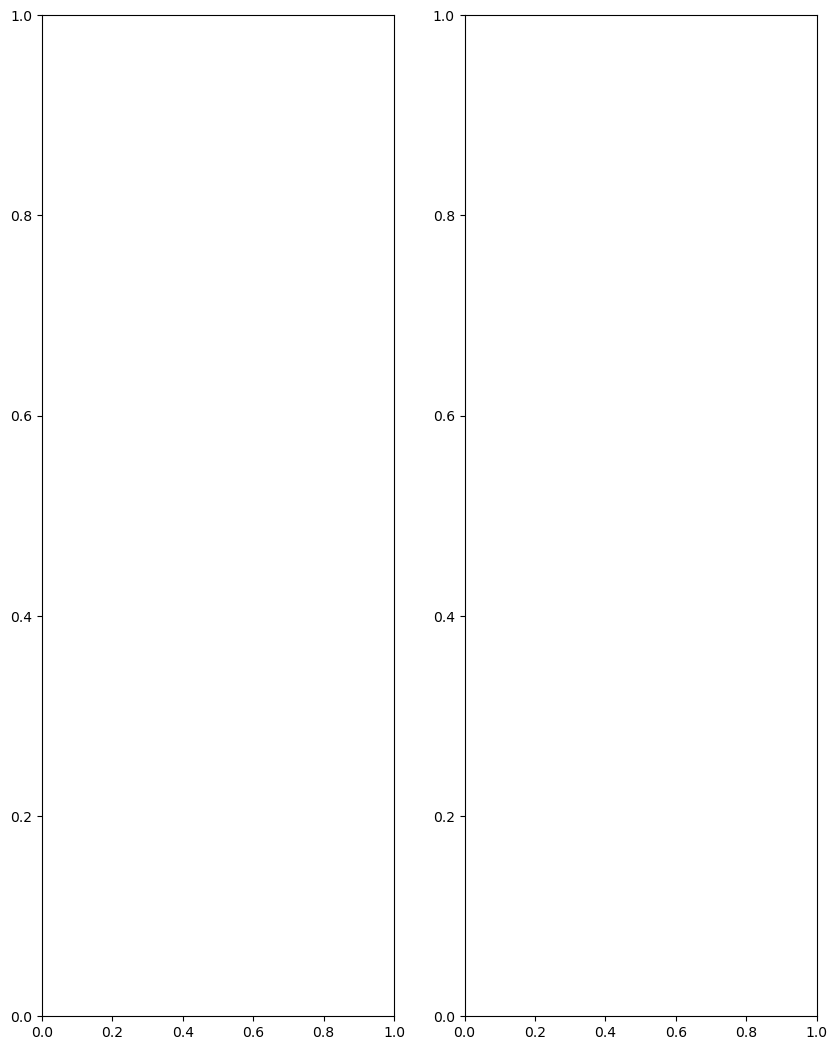

In [140]:
prof=25 # Index for depth <----------
# TURBIDITY PLOT FOR EACH MONTH SINCE JANUARY TO JUNE 2023 
plt.subplots(1, 1 , figsize=(10, 13))
turbidity_jan=map.contourf(x,y,turb_jan[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_jan.cvalues.min(), vmax=turbidity_jan.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jan.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_jan.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in January',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
#
plt.subplots(1, 2 , figsize=(10, 13))
turbidity_feb=map.contourf(x,y,turb_feb[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_feb.cvalues.min(), vmax=turbidity_feb.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_feb.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_feb.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in February',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
#
plt.subplots(1, 3 , figsize=(10, 13))
turbidity_mar=map.contourf(x,y,turb_mar[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_mar.cvalues.min(), vmax=turbidity_mar.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_mar.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_mar.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in March',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
#
plt.subplots(2, 1 , figsize=(10, 13))
turbidity_apr=map.contourf(x,y,turb_apr[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_apr.cvalues.min(), vmax=turbidity_apr.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_apr.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_apr.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in April',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
#
plt.subplots(2, 2 , figsize=(10, 13))
turbidity_may=map.contourf(x,y,turb_may[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_may.cvalues.min(), vmax=turbidity_may.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_may.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_may.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in May',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
#
plt.subplots(2, 3 , figsize=(10, 13))
turbidity_jun=map.contourf(x,y,turb_jun[0,prof,:,:],range(0,6,1),cmap=cm.haline)
norm= pc.Normalize(vmin=turbidity_jun.cvalues.min(), vmax=turbidity_jun.cvalues.max())# Continuous colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap = turbidity_jun.cmap)
sm.set_array([])
map.contourf(x, y, grid['Bathymetry'], [-0.01, prof], colors='lightgray', zorder=3)
map.contour( x, y, grid['Bathymetry'], [prof], colors='Black', zorder=4)
cb = map.colorbar(sm,'bottom', ticks=turbidity_jun.levels, size="3%", pad="2%")
plt.title(f'Turbidity at '+ str(round(depth[prof],1)) + f'm depth in June',fontsize=16)
cb.set_label('Turbidity [NTU]',fontsize=16)
plt.show()


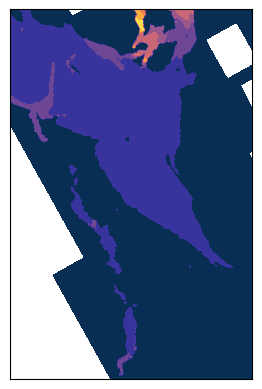